In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('./dataSet/BankNote_Authentication.csv')

In [4]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
df['class'].unique()

array([0, 1], dtype=int64)

In [6]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [7]:
df.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

In [8]:
df.columns[:-1]

Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object')

In [12]:
for col in df.columns[:-1]:
    print("Column {} \n Max : {} and Min : {} values \n".format(col,df[col].max(),df[col].min()))
    

Column variance 
 Max : 6.8248 and Min : -7.0421 values 

Column skewness 
 Max : 12.9516 and Min : -13.7731 values 

Column curtosis 
 Max : 17.9274 and Min : -5.2861 values 

Column entropy 
 Max : 2.4495 and Min : -8.5482 values 



In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(df.drop('class',axis=1))
scaler = scaler.transform(df.drop('class',axis=1))

In [16]:
scaler

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       ...,
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ]])

In [17]:
scaled_df = pd.DataFrame(scaler,columns=df.columns[:-1])

In [18]:
scaled_df.head()

,variance,skewness,curtosis,entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


In [19]:
for col in scaled_df.columns:
    print("Column {} \n Max : {} and Min : {} values \n".format(col,scaled_df[col].max(),scaled_df[col].min()))

Column variance 
 Max : 2.2490077620232527 and Min : -2.630737161496713 values 

Column skewness 
 Max : 1.8799080948850557 and Min : -2.675251510562731 values 

Column curtosis 
 Max : 3.836585778226311 and Min : -1.5513033715325395 values 

Column entropy 
 Max : 1.7336798771860287 and Min : -3.502703420365759 values 



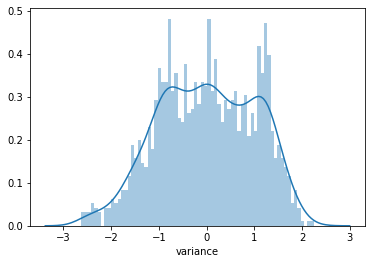

In [20]:
# we can find that features are scaled and to be set to fit in normal distribution
sns.distplot(scaled_df['variance'],bins=70)

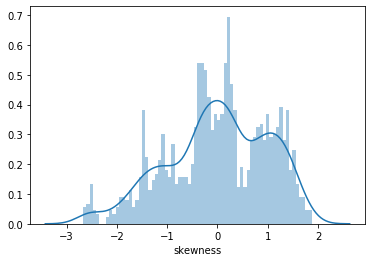

In [21]:
sns.distplot(scaled_df['skewness'],bins=70)

In [22]:
# now we will set dependent and undependent variables

X = scaled_df
y = df['class']

In [23]:
X.head()

,variance,skewness,curtosis,entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


In [24]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lg_model = LogisticRegression()

In [32]:
lg_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
predict = lg_model.predict(X_test)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix
print("Confusion Matrix:\n")
print(confusion_matrix(y_test,predict))

print("\nClassification Report:\n")
print(classification_report(y_test,predict))

Confusion Matrix:

[[223   6]
 [  2 181]]

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       229
           1       0.97      0.99      0.98       183

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



In [40]:
# we can test the model with randomforectClassfier
# in RandomForest and decision trees we don't need to scale features, so we will use the ordiginal dataframe "df" to predict the out

from sklearn.ensemble import RandomForestClassifier

In [41]:
rfc = RandomForestClassifier(n_estimators=100)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.3, random_state=42)

In [51]:
X_test.head()

,variance,skewness,curtosis,entropy
430,1.569100,6.3465,-0.1828,-2.4099
588,-0.278020,8.1881,-3.1338,-2.5276
296,0.051979,7.0521,-2.0541,-3.1508
184,-1.755900,11.9459,3.0946,-4.8978
244,2.428700,9.3821,-3.2477,-1.4543


In [54]:
rfc.fit(X_train,y_train)
pred = rfc.predict(X_test)

In [55]:
print("Confusion Matrix:\n")
print(confusion_matrix(y_test,pred))

print("\nClassification Report:\n")
print(classification_report(y_test,pred))

Confusion Matrix:

[[228   1]
 [  1 182]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       0.99      0.99      0.99       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.9951456310679612

In [60]:
# now we will pickel the file to use for deployment and actual use
import pickle
pickel_out = open('banknote.pkl','wb')
pickle.dump(rfc,pickel_out)
pickel_out.close()

In [61]:
rfc.predict([[2,3,4,1]])

array([0], dtype=int64)